In [5]:
!wget -nc https://raw.githubusercontent.com/Vrekrer/DataRepo/refs/heads/main/UCSP_Electro_2025/MIniCricuits_Open.csv
!wget -nc https://raw.githubusercontent.com/Vrekrer/DataRepo/refs/heads/main/UCSP_Electro_2025/MIniCricuits_Short.csv
!wget -nc https://raw.githubusercontent.com/Vrekrer/DataRepo/refs/heads/main/UCSP_Electro_2025/Trans_MC.s2p

File ‘1m_Open.csv’ already there; not retrieving.

File ‘1m_Short.csv’ already there; not retrieving.

File ‘MIniCricuits_Open.csv’ already there; not retrieving.

File ‘MIniCricuits_Short.csv’ already there; not retrieving.

File ‘Trans_MC.s2p’ already there; not retrieving.



In [10]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [36]:
#Funciones para importar los datos de los archivos de las medidas.

class data_from_s1p(object):
    def __init__(self, fileName):
        raw_data = np.loadtxt(fileName)
        self.f = raw_data[:,0]
        self.omega = 2 * np.pi * self.f
        self.S11 = raw_data[:,1] + 1.0j*raw_data[:,2]
        self.Zin = 50 * (1 + self.S11)/(1 - self.S11)

class data_from_s2p(object):
    def __init__(self, fileName):
        raw_data = np.loadtxt(fileName)
        self.f = raw_data[:,0]
        self.omega = 2 * np.pi * self.f
        self.S11 = raw_data[:,1] + 1.0j*raw_data[:,2]
        self.S21 = raw_data[:,3] + 1.0j*raw_data[:,4]
        self.Zin = 50 * (1 + self.S11)/(1 - self.S11)


class data_from_cvs(object):
    def __init__(self, fileName):
        raw_data = np.loadtxt(fileName, skiprows=1, delimiter=',', usecols=[0,1,2])
        self.f = raw_data[:,0]
        self.omega = 2 * np.pi * self.f
        self.S11 = raw_data[:,1] + 1.0j*raw_data[:,2]
        self.Zin = 50 * (1 + self.S11)/(1 - self.S11)


In [66]:
#Importamos todos los datos y calculamos gamma y R, L, G y C.

dataOpen = data_from_cvs('MIniCricuits_Open.csv')
dataShort = data_from_cvs('MIniCricuits_Short.csv')
dataTrans = data_from_s2p('Trans_MC.s2p')

d = 76.2E-3 + 0.017 #longitud del Cable Minicircuits 086-3SM+ + conector

f = dataOpen.f
omega = dataOpen.omega
lg = np.log( (dataOpen.S11 - dataShort.S11)/2 ) #Promedio de las medidas Open y Short
gamma = -(lg.real + 1.0j * np.unwrap(lg.imag))/ (2 * d)

Z0c = np.sqrt(dataOpen.Zin * dataShort.Zin)

Z0 = 50

R = np.real(gamma * Z0)
L = np.imag(gamma * Z0)/omega

G = np.real(gamma / Z0)
C = np.imag(gamma / Z0)/omega

figureSize = (3,2.5) #Use esto para figuras para un informe o presentacion
#figureSize = (5,4) #Use esto para figuras en el ordenador


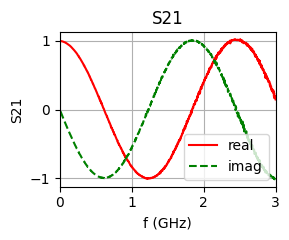

In [68]:
#Gráfico del parámetro S21 transmitido
plt.figure("S21", figureSize)
plt.plot(dataTrans.f/1E9, dataTrans.S21.real, "r-")
plt.plot(dataTrans.f/1E9, dataTrans.S21.imag, "g--")
plt.xlabel('f (GHz)')
plt.ylabel('S21')
plt.yticks([-1,0,1])
plt.grid(True)
plt.legend(['real', 'imag'], loc=4)
plt.title('S21')
plt.xlim(0,3)
plt.tight_layout()
plt.savefig('S21.png')

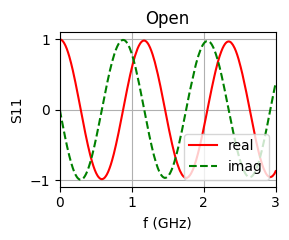

In [69]:
#Gráfico del parámetro S11 reflejado para el circuito abierto
plt.figure("S11", figureSize)
plt.plot(f/1E9, dataOpen.S11.real, "r-")
plt.plot(f/1E9, dataOpen.S11.imag, "g--")
plt.xlabel('f (GHz)')
plt.ylabel('S11')
plt.yticks([-1,0,1])
plt.xlim(0,3)
plt.grid(True)
plt.legend(['real', 'imag'], loc=4)
plt.title('Open')
plt.tight_layout()
plt.savefig('S11_Open.png')

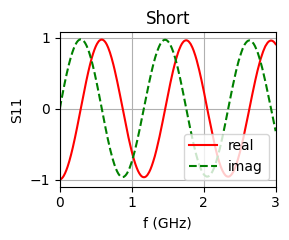

In [70]:
#Gráfico del parámetro S11 reflejado para el circuito cerrado
plt.figure("S11", figureSize)
plt.plot(f/1e9, dataShort.S11.real, "r-")
plt.plot(f/1e9, dataShort.S11.imag, "g--")
plt.xlabel('f (GHz)')
plt.xlim(0,3)
plt.ylabel('S11')
plt.yticks([-1,0,1])
plt.grid(True)
plt.legend(['real', 'imag'], loc=4)
plt.title('Short')
plt.tight_layout()
plt.savefig('S11_Short.png')

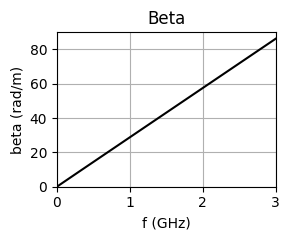

In [72]:
#Grafico del parametro Beta calculado del promedio de las medidas de reflexion
plt.figure("Beta", figureSize)
plt.plot(f/1e9, gamma.imag, "k-")
plt.xlabel('f (GHz)')
plt.ylabel('beta (rad/m)')
plt.xlim(0,3)
plt.ylim(0, 90)
plt.grid(True)
plt.title('Beta')
plt.tight_layout()
plt.savefig('beta.png')

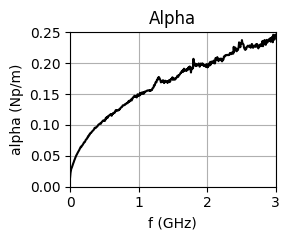

In [73]:
#Grafico del parametro Alpha calculado del promedio de las medidas de reflexion
plt.figure("Alpha", figureSize)
plt.plot(f/1e9, gamma.real, "k-")
plt.xlabel('f (GHz)')
plt.ylabel('alpha (Np/m)')
plt.xlim(0,3)
plt.ylim(0,0.25)
plt.grid(True)
plt.title('Alpha')
plt.tight_layout()
plt.savefig('ampha.png')

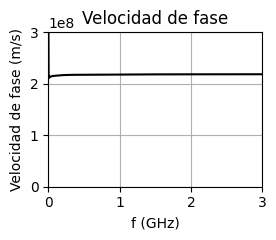

In [74]:
#Grafico de la velocidad de fase calculada del promedio de las medidas de reflexion

vf = omega/gamma.imag

plt.figure("Velocidad de fase", figureSize)
plt.plot(f/1e9, vf, "k-")
plt.xlabel('f (GHz)')
plt.ylabel('Velocidad de fase (m/s)')
plt.grid(True)
plt.xlim(0,3)
plt.title('Velocidad de fase')
plt.ylim(0,3E8)
plt.tight_layout()
plt.savefig('vel_phase.png')

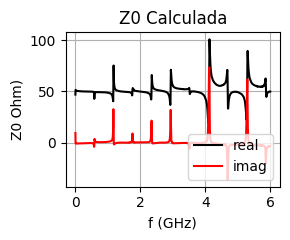

In [75]:
#Grafico de Z0 calculado del promedio de las medidas de reflexion

plt.figure("Z0", figureSize)
plt.plot(f/1e9, Z0c.real, "k-")
plt.plot(f/1e9, Z0c.imag, "r-")
plt.xlabel('f (GHz)')
plt.ylabel('Z0 Ohm)')
plt.grid(True)
plt.title('Z0 Calculada')
plt.legend(['real', 'imag'], loc=4)
plt.tight_layout()
plt.savefig('Z0.png')

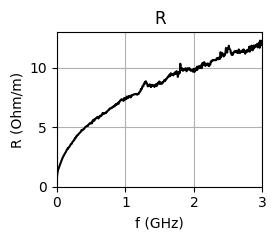

In [76]:
#Grafico de R calculado del promedio de las medidas de reflexion

plt.figure("Resistencia", figureSize)
plt.plot(f/1e9, R, "k-")
plt.xlabel('f (GHz)')
plt.ylabel('R (Ohm/m)')
plt.xlim(0,3)
plt.ylim(0,13)
plt.grid(True)
plt.title('R')
plt.tight_layout()
plt.savefig('R.png')

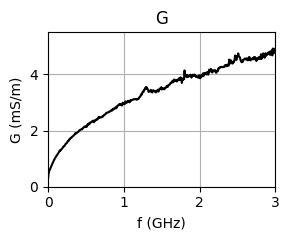

In [77]:
#Grafico de G calculado del promedio de las medidas de reflexion

plt.figure("Conductancia", figureSize)
plt.plot(f/1e9, G*1E3, "k-")
plt.xlabel('f (GHz)')
plt.ylabel('G (mS/m)')
plt.grid(True)
plt.title('G')
plt.xlim(0,3)
plt.ylim(0,5.5)
plt.tight_layout()
plt.savefig('G.png')

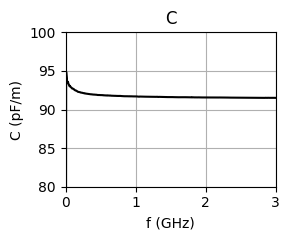

In [79]:
#Grafico de C calculado del promedio de las medidas de reflexion

plt.figure("Capacitancia", figureSize)
plt.plot(f/1e9, C*1E12, "k-")
plt.xlabel('f (GHz)')
plt.ylabel('C (pF/m)')
plt.xlim(0,3)
plt.ylim(80,100)
plt.grid(True)
plt.title('C')
plt.tight_layout()
plt.savefig('C.png')

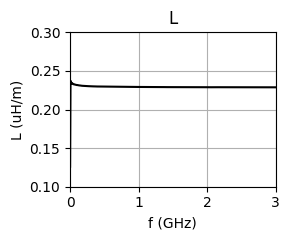

In [80]:
#Grafico de L calculado del promedio de las medidas de reflexion

plt.figure("Inductancia", figureSize)
plt.plot(f/1e9, L*1E6, "k-")
plt.xlabel('f (GHz)')
plt.ylabel('L (uH/m)')
plt.xlim(0,3)
plt.ylim(0.1,0.3)
plt.grid(True)
plt.title('L')
plt.tight_layout()
plt.savefig('L.png')